In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
Car = pd.read_csv(r"/content/drive/MyDrive/car data.csv", header=0)

Car = Car.copy()

Car.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
Car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
Car.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

In [ ]:
Car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
Car['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
Car['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
Car['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [ ]:
fuel_type = Car['Fuel_Type']
seller_type = Car['Seller_Type']
transmission_type = Car['Transmission']
selling_price = Car['Selling_Price']

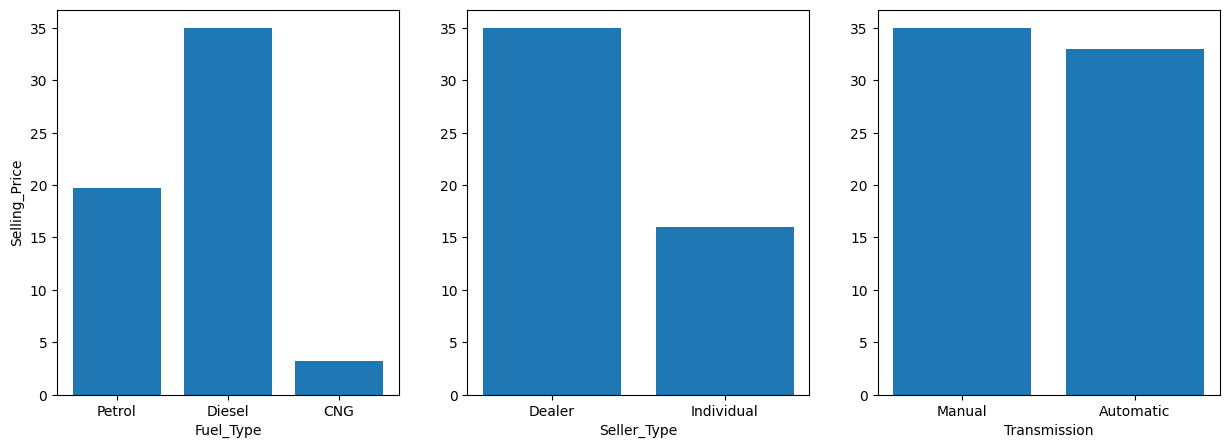

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price)
plt.xlabel("Fuel_Type")
plt.ylabel("Selling_Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price)
plt.xlabel("Seller_Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price)
plt.xlabel('Transmission')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib import style
import seaborn as sns

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

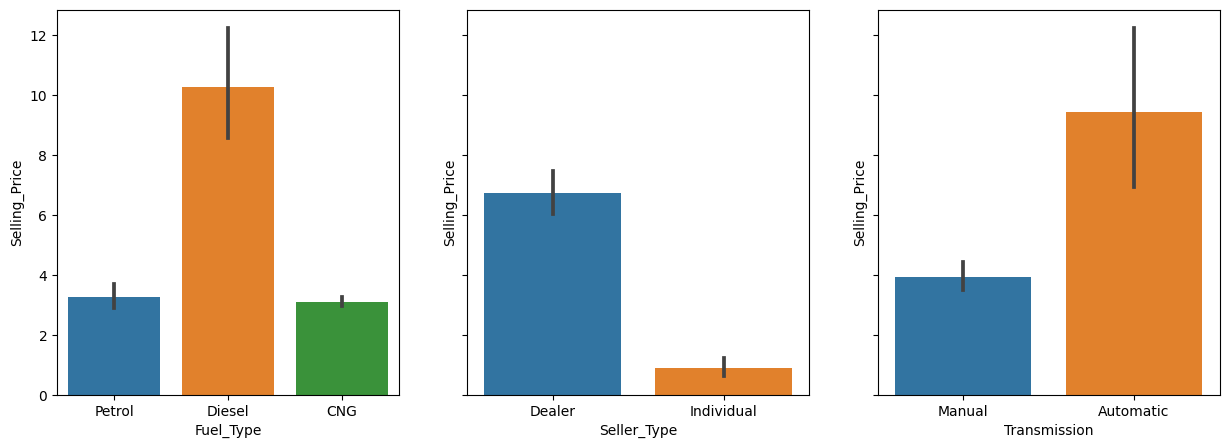

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

In [ ]:
petrol_data = Car.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   239.000000     239.000000     239.000000     239.000000  239.000000
mean   2013.539749       3.264184       5.583556   33528.937238    0.050209
std       3.042674       3.135537       5.290685   40308.984886    0.270368
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.600000       0.940000   13850.000000    0.000000
50%    2014.000000       2.650000       4.600000   25870.000000    0.000000
75%    2016.000000       5.200000       7.980000   44271.000000    0.000000
max    2017.000000      19.750000      23.730000  500000.000000    3.000000

In [ ]:
seller_data = Car.groupby('Seller_Type').get_group('Dealer')
seller_data.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   195.000000     195.000000     195.000000     195.000000  195.000000
mean   2013.712821       6.721692      10.886308   39850.133333    0.020513
std       2.686275       5.136088       8.806563   24860.401003    0.142111
min    2003.000000       1.050000       2.690000    2071.000000    0.000000
25%    2012.000000       3.750000       6.580000   22148.500000    0.000000
50%    2014.000000       5.250000       8.500000   39485.000000    0.000000
75%    2016.000000       7.625000      13.460000   51785.500000    0.000000
max    2018.000000      35.000000      92.600000  197176.000000    1.000000

In [ ]:
Car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
Car.replace({'Owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)
Car=pd.get_dummies(Car,columns=['Seller_Type','Transmission'],drop_first=True)

In [ ]:
Car.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Owner  \
0     ritz  2014           3.35           5.59       27000          0      0   
1      sx4  2013           4.75           9.54       43000          1      0   
2     ciaz  2017           7.25           9.85        6900          0      0   
3  wagon r  2011           2.85           4.15        5200          0      0   
4    swift  2014           4.60           6.87       42450          1      0   

   Seller_Type_Individual  Transmission_Manual  
0                       0                    1  
1                       0                    1  
2                       0                    1  
3                       0                    1  
4                       0                    1

<ipython-input-29-0f7a7de93718>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Car.corr(),annot=True)


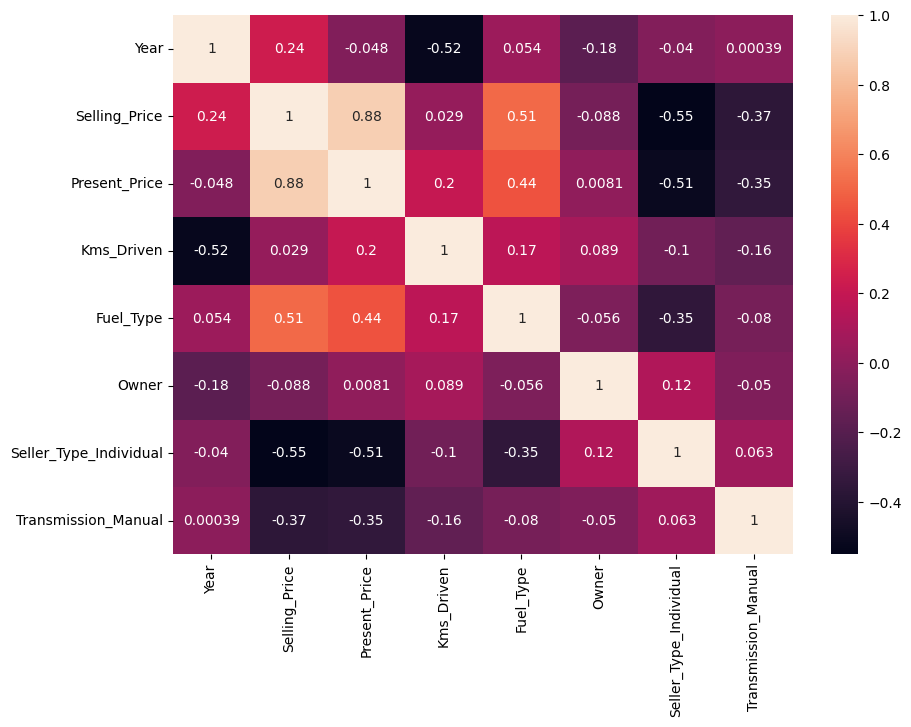

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(Car.corr(),annot=True)
plt.show()

In [ ]:
X=Car.drop(['Car_Name','Selling_Price'],axis=1)
y=Car['Selling_Price']

In [ ]:
print("shape of X is:",X.shape)
print("shape of y is:",y.shape)

shape of X is: (301, 7)
shape of y is: (301,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (91, 7)
X_train shape: (210, 7)
y_test shape:  (91,)
y_train shape: (210,)


In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test-scaler.transform(X_test)

Year  Present_Price     Kms_Driven  Fuel_Type     Owner  \
176  2012.029452       1.755239   30000.141806   0.493211  0.199007   
253  2013.950326       9.688320   47999.728320  -0.915495  0.199007   
12   2014.590617       9.724176   15000.486378   0.493211  0.199007   
16   2014.590617      10.486110   41677.873546  -0.915495  0.199007   
193  2013.310035       1.396682   24000.279635   0.493211 -4.024938   
..           ...            ...            ...        ...       ...   
183  2013.310035       1.235331   21000.348549   0.493211  0.199007   
119  2013.310035       2.517174    5400.706904   0.493211  0.199007   
57   2011.389161      17.433159   49999.682378   0.493211  0.199007   
37   2006.907122       2.857803  126997.913577   0.493211  0.199007   
34   2013.950326       8.038957   44999.797235  -0.915495  0.199007   

     Seller_Type_Individual  Transmission_Manual  
176               -0.327840             0.599724  
253                0.753103             0.599724  
12                 0.753103             2.498275  
16                 0.753103             0.599724  
193               -0.327840             0.599724  
..                      ...                  ...  
183               -0.327840             0.599724  
119               -0.327840             0.599724  
57                 0.753103             0.599724  
37                -0.327840             0.599724  
34                 0.753103             0.599724  

[91 rows x 7 columns]

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
pred = lm.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

MAE:  5055.321099492977
MSE:  43623483.31059885
R2 score:  -0.9974524342957471


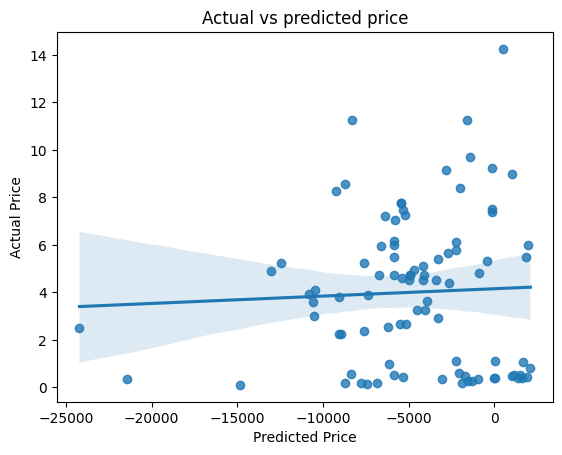

In [ ]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()